# Import

https://colab.research.google.com/drive/1ZQvuAVwA3IjybezQOXnrXMGAnMyZRuPU#scrollTo=diVtyCJCurxJ

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import re
import math
from scipy.spatial.distance import cosine

In [3]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

import matplotlib.pyplot as plt

print(torch.__version__)


0.4.1


In [4]:
import pandas as pd
print(pd.__version__)

1.0.5


In [5]:
from scipy.spatial.distance import cosine

# Load df

In [6]:
df = pd.read_csv('datoteka_za_rad.csv')

In [7]:
df.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated


### Tokenizer

In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Input Formatting

2 Sentence Input:

[CLS] The man went to the store. [SEP] He bought a gallon of milk. [SEP]

1 Sentence Input:

[CLS] The man went to the store. [SEP]

# Example:

In [9]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [10]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [11]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102


In [12]:
# Mark each of the 22 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=

In [14]:
# Predict hidden states features for each layer
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)

In [15]:
print ("Number of layers:", len(encoded_layers))
layer_i = 0

print ("Number of batches:", len(encoded_layers[layer_i]))
batch_i = 0

print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

Number of layers: 12
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


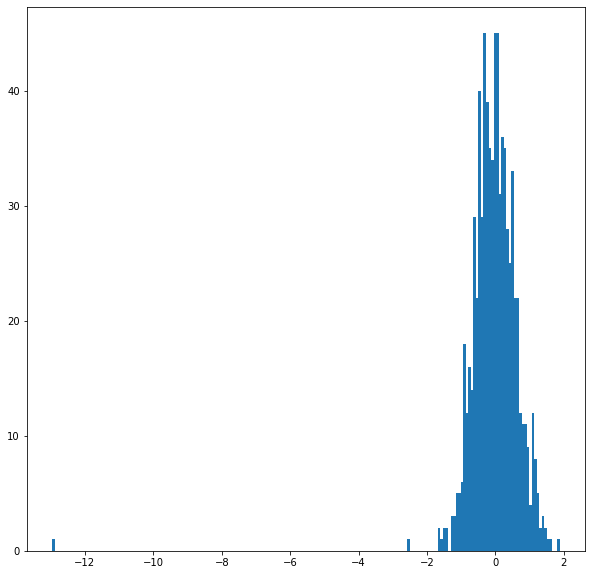

In [16]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [17]:
# `encoded_layers` is a Python list.
print('     Type of encoded_layers: ', type(encoded_layers))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', encoded_layers[0].size())

     Type of encoded_layers:  <class 'list'>
Tensor shape for each layer:  torch.Size([1, 22, 768])


In [18]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(encoded_layers, dim=0)

token_embeddings.size()

torch.Size([12, 1, 22, 768])

In [19]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([12, 22, 768])

In [20]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([22, 12, 768])

In [21]:
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 22 x 3072


In [22]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 22 x 768


In [23]:
# `encoded_layers` has shape [12 x 1 x 22 x 768]

# `token_vecs` is a tensor with shape [22 x 768]
token_vecs = encoded_layers[11][0]

# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)

In [24]:
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

Our final sentence embedding vector of shape: torch.Size([768])


In [25]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 [SEP]


In [26]:
print('First 5 vector values for each instance of "bank".')
print('')
print("bank vault   ", str(token_vecs_sum[6][:5]))
print("bank robber  ", str(token_vecs_sum[10][:5]))
print("river bank   ", str(token_vecs_sum[19][:5]))

First 5 vector values for each instance of "bank".

bank vault    tensor([ 2.1319, -2.1413, -1.6260,  0.8638,  3.3173])
bank robber   tensor([ 1.1868, -1.5298, -1.3770,  1.0648,  3.1446])
river bank    tensor([ 1.1295, -1.4724, -0.7296, -0.0901,  2.4970])


In [27]:
#from scipy.spatial.distance import cosine

# Calculate the cosine similarity between the word bank 
# in "bank robber" vs "river bank" (different meanings).
diff_bank = 1 - cosine(token_vecs_sum[10], token_vecs_sum[19])

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "bank vault" (same meaning).
same_bank = 1 - cosine(token_vecs_sum[10], token_vecs_sum[6])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_bank)
print('Vector similarity for *different* meanings:  %.2f' % diff_bank)

Vector similarity for  *similar*  meanings:  0.95
Vector similarity for *different* meanings:  0.68


# Bert na našem data

In [28]:
df.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated


In [29]:
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=

In [30]:
def getbert(sentence):
    marked_sentence = "[CLS] " + sentence + " [SEP]"
    tokenized_sentence = tokenizer.tokenize(marked_sentence)
    indexed_tokens_sentence = tokenizer.convert_tokens_to_ids(tokenized_sentence)
    segments_ids_sentence = [1] * len(tokenized_sentence)
    tokens_tensor_sentence = torch.tensor([indexed_tokens_sentence])
    segments_tensors_sentence = torch.tensor([segments_ids_sentence])
    with torch.no_grad():
        encoded_layers_sentence, _ = model(tokens_tensor_sentence, segments_tensors_sentence)
    token_vecs_sentence = encoded_layers_sentence[11][0]
    sentence_embedding = torch.mean(token_vecs_sentence, dim=0)
    return sentence_embedding

In [31]:
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [36]:
bert_results = pd.DataFrame(columns = ['bert', 'Stance'])

In [ ]:
df.reset_index()

i=0
for index, row in df.iterrows():
    j=0
    #get headline_embedding
    title = row['Headline']
    headline_embedding = getbert(title)
    
    sum_sim = 0
    
    for sentence in split_into_sentences(row['articleBody']):
        j += 1
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        sum_sim += cos_sim
        
    if(j == 0):
        sentence_embedding = getbert(row['articleBody'])
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        j += 1
        sum_sim += cos_sim
    
    avg_sim = sum_sim / j
    
    bert_results.loc[i] = [avg_sim, row['Stance']]
    i += 1
    if(i%100 == 0):
        print(i)
    if(i%2000 == 0):
        break

In [67]:
bert_results_related = bert_results[bert_results.Stance == 'related']
bert_results_unrelated = bert_results[bert_results.Stance == 'unrelated']

In [68]:
bert_results_related['bert'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.601992
0.10    0.617005
0.15    0.623843
0.20    0.633216
0.25    0.638187
0.30    0.641688
0.35    0.646916
0.40    0.652417
0.45    0.661294
0.50    0.668464
0.55    0.672384
0.60    0.683943
0.65    0.687291
0.70    0.694414
0.75    0.704689
0.80    0.708743
0.85    0.714267
0.90    0.721413
0.95    0.734654
Name: bert, dtype: float64

In [69]:
bert_results_unrelated['bert'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.503861
0.10    0.521905
0.15    0.533803
0.20    0.545632
0.25    0.553062
0.30    0.560425
0.35    0.566717
0.40    0.574215
0.45    0.580840
0.50    0.586928
0.55    0.592725
0.60    0.599948
0.65    0.606374
0.70    0.613533
0.75    0.620599
0.80    0.628913
0.85    0.637321
0.90    0.647946
0.95    0.668741
Name: bert, dtype: float64

In [71]:
bert_results_max = pd.DataFrame(columns = ['bert', 'Stance'])

In [72]:
df.reset_index()

i=0
for index, row in df.iterrows():
    j=0
    #get headline_embedding
    title = row['Headline']
    headline_embedding = getbert(title)
    
    max_sim = 0
    
    for sentence in split_into_sentences(row['articleBody']):
        j += 1
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        if(cos_sim > max_sim):
            max_sim = cos_sim
        
    if(j == 0):
        sentence_embedding = getbert(row['articleBody'])
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        j += 1
        max_sim = cos_sim
    
    bert_results_max.loc[i] = [max_sim, row['Stance']]
    i += 1
    if(i%50 == 0):
        print(i)
    if(i%500 == 0):
        break

50
100
150
200
250
300
350
400
450
500


In [73]:
bert_results_max_related = bert_results[bert_results.Stance == 'related']
bert_results_max_unrelated = bert_results[bert_results.Stance == 'unrelated']

In [74]:
bert_results_max_related['bert'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.601992
0.10    0.617005
0.15    0.623843
0.20    0.633216
0.25    0.638187
0.30    0.641688
0.35    0.646916
0.40    0.652417
0.45    0.661294
0.50    0.668464
0.55    0.672384
0.60    0.683943
0.65    0.687291
0.70    0.694414
0.75    0.704689
0.80    0.708743
0.85    0.714267
0.90    0.721413
0.95    0.734654
Name: bert, dtype: float64

In [75]:
bert_results_max_unrelated['bert'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.503861
0.10    0.521905
0.15    0.533803
0.20    0.545632
0.25    0.553062
0.30    0.560425
0.35    0.566717
0.40    0.574215
0.45    0.580840
0.50    0.586928
0.55    0.592725
0.60    0.599948
0.65    0.606374
0.70    0.613533
0.75    0.620599
0.80    0.628913
0.85    0.637321
0.90    0.647946
0.95    0.668741
Name: bert, dtype: float64

############### output for first title:

print ("Number of layers:", len(encoded_layers_title))

layer_i = 0

print ("Number of batches:", len(encoded_layers_title[layer_i]))

batch_i = 0

print ("Number of tokens:", len(encoded_layers_title[layer_i][batch_i]))

token_i = 0

print ("Number of hidden units:", len(encoded_layers_title[layer_i][batch_i][token_i]))

Number of layers: 12

Number of batches: 1

Number of tokens: 16

Number of hidden units: 768

###############
    

==================================================================================================================

    #get headline
    title = row['Headline']
    #mark with CLS and SEP
    marked_title = "[CLS] " + title + " [SEP]"
    #tokenize words
    tokenized_title = tokenizer.tokenize(marked_title)
    #get token values
    indexed_tokens_title = tokenizer.convert_tokens_to_ids(tokenized_title)
    
    #print
    #for tup in zip(tokenized_text, indexed_tokens):
    #    print('{:<12} {:>6,}'.format(tup[0], tup[1]))
    
    # 1 1 1 1 1 1..
    segments_ids_title = [1] * len(tokenized_title)
    
    # Convert inputs to PyTorch tensors
    tokens_tensor_title = torch.tensor([indexed_tokens_title])
    segments_tensors_title = torch.tensor([segments_ids_title])
    
    # Predict hidden states features for each layer
    with torch.no_grad():
        encoded_layers_title, _ = model(tokens_tensor_title, segments_tensors_title)
        
    ##############output from here#############
    
    # Combine 12 layers for one big tensor
    ##token_embeddings_title = torch.stack(encoded_layers_title, dim=0)
    
    #print(token_embeddings_title.size()) # 12 1 16 768
    
    #remove batches dimension
    ##token_embeddings_title = torch.squeeze(token_embeddings_title, dim=1)
    #print(token_embeddings_title.size()) # torch.Size([12, 16, 768])
    
    # Swap dimensions 0 and 1.
    ##token_embeddings_title = token_embeddings_title.permute(1,0,2)
    #print(token_embeddings_title.size()) # torch.Size([16, 12, 768])
    
    # Stores the token vectors, with shape [22 x 3,072]
    ##token_vecs_cat_title = []

    # For each token in the sentence... concatenate last 4 layers
    ##for token in token_embeddings_title:
    ##    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    ##    token_vecs_cat_title.append(cat_vec)

    # print ('Shape is: %d x %d' % (len(token_vecs_cat_title), len(token_vecs_cat_title[0]))) # Shape is: 16 x 3072
    
    token_vecs_title = encoded_layers_title[11][0]
    
    sentence_embedding_title = torch.mean(token_vecs_title, dim=0)
    #print(sentence_embedding_title.size()) # torch.Size([768])

==================================================================================================================

# bert na cijelom paragrafu


In [61]:
bert_whole_results = pd.DataFrame(columns = ['bert', 'Stance'])

df.reset_index()

i=0
for index, row in df.iterrows():

    title = row['Headline']
    headline_embedding = getbert(title)
    
    article_embedding = getbert(row['articleBody'])
    
    cos_sim = 1 - cosine(headline_embedding, article_embedding)
        
    bert_whole_results.loc[i] = [cos_sim, row['Stance']]
    i += 1
    print(i)
    
    if(i%2000 == 0):
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


KeyboardInterrupt: 

In [62]:
bert_results_whole_related = bert_whole_results[bert_whole_results.Stance == 'related']
bert_results_whole_unrelated = bert_whole_results[bert_whole_results.Stance == 'unrelated']

In [63]:
bert_results_whole_related['bert'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.652378
0.10    0.666382
0.15    0.680386
0.20    0.694390
0.25    0.708393
0.30    0.722397
0.35    0.732231
0.40    0.733726
0.45    0.735222
0.50    0.736717
0.55    0.738212
0.60    0.739707
0.65    0.741202
0.70    0.743244
0.75    0.745558
0.80    0.747873
0.85    0.750187
0.90    0.752501
0.95    0.754816
Name: bert, dtype: float64

In [64]:
bert_results_whole_unrelated['bert'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.535679
0.10    0.554682
0.15    0.566562
0.20    0.580952
0.25    0.599901
0.30    0.604796
0.35    0.608460
0.40    0.617092
0.45    0.620244
0.50    0.630781
0.55    0.640746
0.60    0.650366
0.65    0.655986
0.70    0.659768
0.75    0.666701
0.80    0.671129
0.85    0.681090
0.90    0.695537
0.95    0.714389
Name: bert, dtype: float64

# todo: za svaku recenicu; uzmi max(bez nepoznate rijeci, sa nepoznatnom rijeci //u naslovu)

In [32]:
def getbert_without(sentence):
    marked_sentence = "[CLS] " + sentence + " [SEP]"
    tokenized_sentence = tokenizer.tokenize(marked_sentence)
    ###tokenize without '##words'
    length = len(tokenized_sentence)
    i = 0
    while(i<length):
        
        if(tokenized_sentence[i][0] == '#'):
            
            while(tokenized_sentence[i][0] == '#'):
                tokenized_sentence.pop(i)
                length -= 1
            tokenized_sentence.pop(i-1)
            length -= 1
            i -= 1
        i += 1
        
    ##print(tokenized_sentence) #end tokenization
    
    indexed_tokens_sentence = tokenizer.convert_tokens_to_ids(tokenized_sentence)
    segments_ids_sentence = [1] * len(tokenized_sentence)
    tokens_tensor_sentence = torch.tensor([indexed_tokens_sentence])
    segments_tensors_sentence = torch.tensor([segments_ids_sentence])
    with torch.no_grad():
        encoded_layers_sentence, _ = model(tokens_tensor_sentence, segments_tensors_sentence)
    token_vecs_sentence = encoded_layers_sentence[11][0]
    sentence_embedding = torch.mean(token_vecs_sentence, dim=0)
    return sentence_embedding

In [34]:
bert_napredak_results = pd.DataFrame(columns = ['sa-sa', 'sa-bez', 'bez-sa', 'bez-bez', 'Stance'])

In [35]:
df.reset_index()

i=0
for index, row in df.iterrows():
    
    j = 0
    #get headline_embedding
    title = row['Headline']
    headline_embedding = getbert(title)
    headline_embedding_without = getbert_without(title)
    
    sim_ss = 0
    sim_sb = 0
    sim_bs = 0
    sim_bb = 0
    
    for sentence in split_into_sentences(row['articleBody']):
        j += 1 
        
        ## zelimo average u sva 4 slucaja
        
        ## sa sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        sim_ss += cos_sim
            
        ## sa bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)    
        sim_sb += cos_sim
        
        ## bez sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        sim_bs += cos_sim
        
        ## bez bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        sim_bb += cos_sim
        
    if(j == 0):
        j = 1
        ## sa sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        sim_ss += cos_sim
            
        ## sa bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)    
        sim_sb += cos_sim
        
        ## bez sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        sim_bs += cos_sim
        
        ## bez bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        sim_bb += cos_sim
    
    sim_ss = sim_ss/j
    sim_bs = sim_bs/j
    sim_bb = sim_bb/j
    sim_sb = sim_sb/j
    
    bert_napredak_results.loc[i] = [sim_ss, sim_sb, sim_bs, sim_bb, row['Stance']]
    i += 1
    if(i%5 == 0):
        print(i)
    if(i>=300):
        break

KeyboardInterrupt: 

In [ ]:
print(bert_napredak_results.to_string())

In [36]:
bert_napredak_results_max = pd.DataFrame(columns = ['sa-sa', 'sa-bez', 'bez-sa', 'bez-bez', 'Stance'])

In [51]:
df.reset_index()

i=0
for index, row in df.iterrows():
    
    j = 0
    #get headline_embedding
    title = row['Headline']
    headline_embedding = getbert(title)
    headline_embedding_without = getbert_without(title)
    
    if(row['Stance'] == 'unrelated'):
            continue
            
    max_ss = 0
    max_sb = 0
    max_bs = 0
    max_bb = 0
    
    for sentence in split_into_sentences(row['articleBody']):
        j += 1 
        
        ## zelimo average u sva 4 slucaja
        
        ## sa sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        if(max_ss < cos_sim):
            max_ss = cos_sim
            
        ## sa bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)    
        if(max_sb < cos_sim):
            max_sb = cos_sim
        
        ## bez sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        if(max_bs < cos_sim):
            max_bs = cos_sim
        
        ## bez bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        if(max_bb < cos_sim):
            max_bb = cos_sim
        
    if(j == 0):
        j = 1
        ## sa sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        max_ss = cos_sim
            
        ## sa bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)    
        max_sb = cos_sim
        
        ## bez sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        max_bs = cos_sim
        
        ## bez bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        max_bb = cos_sim
    
    bert_napredak_results_max.loc[i] = [max_ss, max_sb, max_bs, max_bb, row['Stance']]
    i += 1
    if(i%5 == 0):
        print(i)
    if(i>=300):
        break

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300


In [38]:
print(bert_napredak_results_max.to_string())

        sa-sa    sa-bez    bez-sa   bez-bez     Stance
0    0.627635  0.620608  0.578464  0.578464  unrelated
1    0.612943  0.626350  0.612943  0.626350  unrelated
2    0.689166  0.699177  0.659427  0.692413  unrelated
3    0.597808  0.634351  0.597808  0.634351  unrelated
4    0.660143  0.681400  0.670652  0.716698  unrelated
5    0.671554  0.671554  0.671554  0.671554  unrelated
6    0.684476  0.685156  0.687796  0.687796  unrelated
7    0.656540  0.656540  0.656540  0.656540  unrelated
8    0.650038  0.677106  0.659520  0.683190  unrelated
9    0.578987  0.616212  0.578987  0.616212  unrelated
10   0.721992  0.721992  0.721992  0.721992  unrelated
11   0.647815  0.667102  0.647815  0.667102  unrelated
12   0.562497  0.542274  0.558219  0.580671  unrelated
13   0.681521  0.684489  0.681521  0.684489  unrelated
14   0.638384  0.657983  0.638384  0.657983  unrelated
15   0.696646  0.696646  0.691727  0.691727  unrelated
16   0.601039  0.657830  0.601039  0.657830  unrelated
17   0.645

In [52]:
bert_napredak_results_max_related = bert_napredak_results_max[bert_napredak_results_max.Stance == 'related']
bert_napredak_results_max_unrelated = bert_napredak_results_max[bert_napredak_results_max.Stance == 'unrelated']

In [58]:
bert_napredak_results_max_related['sa-sa'].quantile([.01, .05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, .99])

0.01    0.688457
0.05    0.709983
0.10    0.732371
0.15    0.743061
0.20    0.752685
0.25    0.764993
0.30    0.774630
0.35    0.782564
0.40    0.792877
0.45    0.798543
0.50    0.806359
0.55    0.814102
0.60    0.822401
0.65    0.828489
0.70    0.835244
0.75    0.840653
0.80    0.851319
0.85    0.862414
0.90    0.871631
0.95    0.887814
0.99    0.949210
Name: sa-sa, dtype: float64

In [41]:
bert_napredak_results_max_unrelated['sa-sa'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.585911
0.10    0.605074
0.15    0.620121
0.20    0.630049
0.25    0.637224
0.30    0.644843
0.35    0.652113
0.40    0.660374
0.45    0.667997
0.50    0.676015
0.55    0.681837
0.60    0.689607
0.65    0.697230
0.70    0.707948
0.75    0.715037
0.80    0.722377
0.85    0.730875
0.90    0.742857
0.95    0.763672
Name: sa-sa, dtype: float64

In [ ]:
sum_col = bert_napredak_results_max_related['sa-sa'] - bert_napredak_results_max_related['bez-bez']

bert_napredak_results_max_related_sum = bert_napredak_results_max_related

bert_napredak_results_max_related_sum["sum"] = sum_col

In [ ]:
sum_col = bert_napredak_results_max_unrelated['sa-sa'] - bert_napredak_results_max_unrelated['bez-bez']

bert_napredak_results_max_unrelated_sum = bert_napredak_results_max_unrelated

bert_napredak_results_max_unrelated_sum["sum"] = sum_col

In [55]:
bert_napredak_results_max_related_sum["sum"].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05   -0.024745
0.10   -0.015455
0.15   -0.011208
0.20   -0.006624
0.25   -0.001845
0.30    0.000000
0.35    0.000000
0.40    0.000000
0.45    0.004226
0.50    0.007936
0.55    0.014579
0.60    0.019687
0.65    0.025352
0.70    0.032065
0.75    0.039082
0.80    0.047595
0.85    0.059732
0.90    0.080574
0.95    0.098675
Name: sum, dtype: float64

In [45]:
bert_napredak_results_max_unrelated_sum["sum"].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05   -0.031808
0.10   -0.023099
0.15   -0.016923
0.20   -0.011030
0.25   -0.006605
0.30   -0.003422
0.35   -0.000506
0.40    0.000000
0.45    0.001232
0.50    0.004976
0.55    0.007224
0.60    0.010911
0.65    0.015047
0.70    0.019620
0.75    0.024019
0.80    0.030714
0.85    0.038439
0.90    0.047302
0.95    0.062713
Name: sum, dtype: float64

In [56]:
print(bert_napredak_results_max_related_sum.to_string())

        sa-sa    sa-bez    bez-sa   bez-bez   Stance       sum
0    0.855309  0.751238  0.763842  0.749235  related  0.106074
1    0.765006  0.749426  0.684933  0.700125  related  0.064882
2    0.715473  0.689930  0.715473  0.689930  related  0.025542
3    0.782727  0.781128  0.749278  0.749278  related  0.033449
4    0.805850  0.775058  0.723792  0.725149  related  0.080701
5    0.818662  0.799181  0.773036  0.787995  related  0.030667
6    0.796831  0.748722  0.643255  0.709587  related  0.087244
7    0.810295  0.810295  0.810295  0.810295  related  0.000000
8    0.719077  0.694791  0.682593  0.683731  related  0.035346
9    0.793313  0.736828  0.720594  0.694733  related  0.098580
10   0.744918  0.744918  0.744918  0.744918  related  0.000000
11   0.806868  0.806868  0.806868  0.806868  related  0.000000
12   0.779514  0.763882  0.779514  0.763882  related  0.015632
13   0.915655  0.920901  0.915655  0.920901  related -0.005246
14   0.851319  0.875597  0.845114  0.863322  related -0

In [48]:
print(bert_napredak_results_max_unrelated_sum.to_string())

        sa-sa    sa-bez    bez-sa   bez-bez     Stance       sum
0    0.627635  0.620608  0.578464  0.578464  unrelated  0.049171
1    0.612943  0.626350  0.612943  0.626350  unrelated -0.013407
2    0.689166  0.699177  0.659427  0.692413  unrelated -0.003247
3    0.597808  0.634351  0.597808  0.634351  unrelated -0.036543
4    0.660143  0.681400  0.670652  0.716698  unrelated -0.056555
5    0.671554  0.671554  0.671554  0.671554  unrelated  0.000000
6    0.684476  0.685156  0.687796  0.687796  unrelated -0.003320
7    0.656540  0.656540  0.656540  0.656540  unrelated  0.000000
8    0.650038  0.677106  0.659520  0.683190  unrelated -0.033152
9    0.578987  0.616212  0.578987  0.616212  unrelated -0.037224
10   0.721992  0.721992  0.721992  0.721992  unrelated  0.000000
11   0.647815  0.667102  0.647815  0.667102  unrelated -0.019287
12   0.562497  0.542274  0.558219  0.580671  unrelated -0.018174
13   0.681521  0.684489  0.681521  0.684489  unrelated -0.002969
14   0.638384  0.657983  

# stavi dodatno random naslove rank od 10

In [123]:
bert_napredak_results_max_rank = pd.DataFrame(columns = ['sa-sa', 'bez-bez', 'Stance', 'rank'])

In [ ]:
df.reset_index()

i=0
for index, row in df.iterrows():

    j = 0
    #get headline_embedding
    title = row['Headline']
    headline_embedding = getbert(title)
    headline_embedding_without = getbert_without(title)
            
    max_ss = 0
    max_bb = 0
    
    rank = 1
    
    ############################################################################
    #real
    
    for sentence in split_into_sentences(row['articleBody']):
        j += 1 
        
        ## zelimo average u oba 2 slucaja
        
        ## sa sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        if(max_ss < cos_sim):
            max_ss = cos_sim
        
        ## bez bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        if(max_bb < cos_sim):
            max_bb = cos_sim
        
    if(j == 0):
        j = 1
        ## sa sa
        sentence_embedding = getbert(sentence)
        cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
        max_ss = cos_sim
        
        ## bez bez
        sentence_embedding = getbert_without(sentence)
        cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
        max_bb = cos_sim
        
    #max_ss, max_bb dobiveni
    #######################################################################################
    #fake
    
    for t in range (1,11):
        
        ran_max_bb = 0
        ran_max_ss = 0
    
        randomrow = df.sample()
        for sentence in split_into_sentences(randomrow['articleBody'].to_string()):
            j += 1 

            ## zelimo average u oba 2 slucaja

            ## sa sa
            sentence_embedding = getbert(sentence)
            cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
            if(ran_max_ss < cos_sim):
                ran_max_ss = cos_sim

            ## bez bez
            sentence_embedding = getbert_without(sentence)
            cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
            if(ran_max_bb < cos_sim):
                ran_max_bb = cos_sim

        if(j == 0):
            j = 1
            ## sa sa
            sentence_embedding = getbert(sentence)
            cos_sim = 1 - cosine(headline_embedding, sentence_embedding)
            ran_max_ss = cos_sim

            ## bez bez
            sentence_embedding = getbert_without(sentence)
            cos_sim = 1 - cosine(headline_embedding_without, sentence_embedding)
            ran_max_bb = cos_sim

        if(ran_max_ss > max_ss):
            rank += 1
    #######################################################################################
    
    
    bert_napredak_results_max_rank.loc[i] = [max_ss, max_bb, row['Stance'], rank]
    i += 1
    print(i)
    if(i>=2000):
        break

In [135]:
print(bert_napredak_results_max_rank.to_string())

        sa-sa   bez-bez     Stance rank
0    0.627635  0.578464  unrelated    1
1    0.612943  0.626350  unrelated    1
2    0.689166  0.692413  unrelated    2
3    0.597808  0.634351  unrelated    4
4    0.660143  0.716698  unrelated    1
5    0.671554  0.671554  unrelated    1
6    0.684476  0.687796  unrelated    5
7    0.656540  0.656540  unrelated    3
8    0.650038  0.683190  unrelated    2
9    0.578987  0.616212  unrelated    4
10   0.721992  0.721992  unrelated    1
11   0.647815  0.667102  unrelated    2
12   0.562497  0.580671  unrelated    1
13   0.681521  0.684489  unrelated    2
14   0.638384  0.657983  unrelated    2
15   0.696646  0.691727  unrelated    2
16   0.601039  0.657830  unrelated    3
17   0.645673  0.668799  unrelated    2
18   0.710755  0.720303  unrelated    1
19   0.665383  0.665383  unrelated    4
20   0.635036  0.639836  unrelated    2
21   0.536775  0.583193  unrelated    6
22   0.580292  0.580292  unrelated    5
23   0.684295  0.672309  unrelated    3
